In [1]:
import numpy as np
import networkx as nx

In [2]:
N = 20
Gsmall = nx.connected_watts_strogatz_graph(N, 4, .1, seed=42)
M = nx.to_numpy_array(Gsmall)
A = np.array([0, 1, 19], dtype=np.intp)

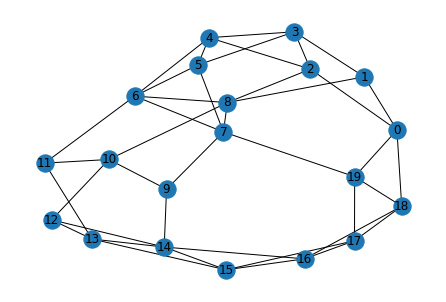

# Volumes de graphes

**Question** Calculer le volume de $\mathrm{Vol}_{\mathbf{M}}(A)$ qui est la somme des degrés des noeuds de $A$ dans le graphe dont la matrice d'adjacence est $\mathbf{M}$. 

In [3]:
Vol_M_A = M[:,A].sum()

In [4]:
Vol_M_A

11.0

**Question** Quel est le volume de $\bar A$, le complémentaire de $A$ ? Comment aussi le calculer par le volume du graphe ?


*Aide* : On peut utiliser `np.setdiff1d` pour calculer une différence ensembliste ou passer par les ensembles de python.  

In [5]:
A_ = np.setdiff1d(np.arange(M.shape[0]),A)
A_

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [6]:
Vol_M_A_ = M[A_].sum()

In [7]:
Vol_M_A_

69.0

In [8]:
Vol_M = M.sum()
Vol_M - Vol_M_A

69.0

In [9]:
def vols(M,A):
    return M[:,A].sum(),M.sum() - M[:,A].sum()

# Cuts : cas de la bisection  

**Question** Calculer le poids de toutes les arêtes qui lient un noeud de $A$ avec un noeud hors de $A$ dans le graphe dont la matrice d'adjacence est ${\mathbf M}$. C'est le $\mathrm{Cut}_{\mathbf M}(A,\bar A)$.

*Aide* : Si on range les noeuds dans la matrice d'adjacence selon $A$ et $\bar A$ on a 

$$\mathbf M = \begin{array}{|c|c|}\hline A\leftrightarrow A & A\to \bar A \\ \hline \bar A\to A &\bar A\leftrightarrow \bar A \\ \hline \end{array}$$
et on peut regarder uniquement le coin supérieur droit.

*Aide* : Voir [Advanced indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html#advanced-indexing). `X[[1,2],[3,4]]`  fonctionne comme du broadcast et ce n'est pas ce qu'on veut. On peut utiliser `np.ix_` ou deux fois un basic slicing... 
     

In [10]:
cut_M = M[:,A_][A].sum()

In [11]:
cut_M

7.0

**Question** Écrire trois fonctions pour calculer le $\mathrm{Cut}_{\mathbf M}(A,\bar A)$, le $\mathrm{RatioCut}_{\mathbf M}(A,\bar A)$ et le $\mathrm{NCut}_{\mathbf M}(A,\bar A)$. Les fonctions prennent en argument une matrice d'adjacence et un ensemble d'indices de noeuds.

\begin{align*}
   \mathrm{Cut}_{\mathbf M}(A,\bar A)&= \frac{1}{2}\sum_{i\in A,j\not\in A}M_{ij}\\
   \mathrm{RatioCut}_{\mathbf M}(A,\bar A)&=\mathrm{Cut}_{\mathbf M}(A,\bar A)\bigg (\frac{1}{\lvert A\rvert}+\frac{1}{{\lvert \bar A\rvert}}\bigg )\\
   \mathrm{NCut}_{\mathbf M}(A,\bar A) &= \mathrm{Cut}_{\mathbf M}(A,\bar A)\bigg (\frac{1}{\mathrm{Vol}(A)}+\frac{1}{\mathrm{Vol}(\bar A)}\bigg )
\end{align*}

In [12]:
def cut_1(M,A):
    A_ = np.setdiff1d(np.arange(M.shape[0]),A)
    sum = 0
    for i in A:
        for j in A_:
            sum += M[i][j]
    return sum

def cut_2(M,A,returnA_=False):
    A_ = np.setdiff1d(np.arange(M.shape[0]),A)
    cut_M_A = M[:,A_][A].sum()
    if returnA_:
        return cut_M_A , A_
    return cut_M_A 

cut_1(M,A) == cut_2(M,A)

True

In [13]:
def ratio_cut(M,A):
    cut,A_ = cut_2(M,A,True)
    return cut * (1/len(A) + 1/len(A_))

def Ncut(M,A):
    cut,A_ = cut_2(M,A,True)
    Vol_M_A,Vol_M_A_ = vols(M,A)
    return cut * (1/Vol_M_A + 1/Vol_M_A_)
    

In [14]:
print('The RatioCut is : ',ratio_cut(M,A),'\nThe NCut is : ',Ncut(M,A))

The RatioCut is :  2.7450980392156863 
The NCut is :  0.7378129117259552


**Question** Calculer les 3 valeurs de cut pour les ensembles A suivants 

- 2
- 0, 1, 19
- 3, 10, 11, 15, 16, 17, 18
- 1, 2, 3, 4, 5, 6, 7, 8 ,9, 10 
- 2, 3, 6, 11, 12, 15, 16, 17, 18

Quel est le meilleur cut ? Le meilleur RatioCut et NCut ? 

In [15]:
As = [
[2],
[0, 1, 19],
[3, 10, 11, 15, 16, 17, 18],
[1, 2, 3, 4, 5, 6, 7, 8 ,9, 10 ],
[2, 3, 6, 11, 12, 15, 16, 17, 18]
]

In [16]:
for a in As:
    print('With A =',a)
    print('The Cut value is',cut_2(M,a),' \nThe RatioCut is : ',ratio_cut(M,a),'\nThe NCut is : ',Ncut(M,a),'\n')

With A = [2]
The Cut value is 4.0  
The RatioCut is :  4.2105263157894735 
The NCut is :  1.0526315789473684 

With A = [0, 1, 19]
The Cut value is 7.0  
The RatioCut is :  2.7450980392156863 
The NCut is :  0.7378129117259552 

With A = [3, 10, 11, 15, 16, 17, 18]
The Cut value is 15.0  
The RatioCut is :  3.2967032967032965 
The NCut is :  0.8385744234800838 

With A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The Cut value is 7.0  
The RatioCut is :  1.4000000000000001 
The NCut is :  0.35021888680425267 

With A = [2, 3, 6, 11, 12, 15, 16, 17, 18]
The Cut value is 21.0  
The RatioCut is :  4.242424242424242 
The NCut is :  1.0666666666666667 



# Approche par des formes quadratiques

**Remarque** On peut s'inspirer des fonctions qui sont "smooth" sur le graphe pour définir un labelling des noeuds. Si on met +1 ou -1 comme label associé aux noeuds alors une fonction smooth sera sans doute celle qui réalisera un cut qui ne sera pas trop grand...  

**Question** Sans faire de calcul à la machine, quelle est la valeur de la forme quadratique $\mathbf f^\top \mathbf L \mathbf f$ si $\mathbf f$ est un labelling qui associe +1 au noeud numéro 2 et -1 à tous les autres ? 

*Réponse* : 

**Question** Pour ces ensembles $A$ de la question précédente définir un labelling des noeuds qui mettent 1 aux noeuds de $A$ et -1 aux noeuds de $\bar A$

In [17]:
def labelling(M,A):
    f = np.ones(M.shape[0]) *-1
    f[A] = 1
    return f
    
labellings = {}

In [18]:
for i,a in enumerate(As):
    labellings[i] = labelling(M,a)

In [19]:
labellings

{0: array([-1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.]),
 1: array([ 1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.,  1.]),
 2: array([-1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
        -1., -1.,  1.,  1.,  1.,  1., -1.]),
 3: array([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.]),
 4: array([-1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,
        -1., -1.,  1.,  1.,  1.,  1., -1.])}

**Question** Calculer pour chaque labelling ainsi constitué $\mathbf f$, la valeur de $\mathbf f^\top \mathbf L\mathbf f$ où $\mathbf L$ est le laplacien du graphe. 

In [20]:
L = np.diag(M.sum(1)) - M 
print('Values of f"Lf:')
for i,l in labellings.items():
    print('For',As[i],' = ',l.T@L@l)

Values of f"Lf:
For [2]  =  16.0
For [0, 1, 19]  =  28.0
For [3, 10, 11, 15, 16, 17, 18]  =  60.0
For [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  =  28.0
For [2, 3, 6, 11, 12, 15, 16, 17, 18]  =  84.0


**Question** Quelle correspondance avez-vous trouvée ? Est-ce que minimiser cette forme quadratique trouve des cuts intéressants ? Pourquoi ?

*Réponse* :
- On peut remarquer que les valeurs ci-dessus, valent 4 x le $cut$ associé à chaque $A$.

**Question** Calculer maintenant des  $\mathbf f$ en rempalçant les -1 par  $- \sqrt{\frac{\lvert A\rvert}{\lvert \bar A\rvert}}$ et les +1 par $\sqrt{\frac{\lvert \bar A\rvert}{\lvert A\rvert}}$. Que faut $\sum_i \mathbf f_i$ ainsi que $\lVert \mathbf f\rVert_2$, la norme 2 de $\mathbf f$. Cacluler cela à la main et ensuite à la machine.

*Réponse* : 
- La somme vaudra 0, et la norme de 2 vaudra la racine carré de $n$.

In [22]:
def labelling_(M,A):
    A_ = np.setdiff1d(np.arange(M.shape[0]),A)
    f = np.ones(M.shape[0]) * -np.sqrt(len(A)/len(A_))
    f[A] = np.sqrt(len(A_)/len(A))
    return f
    
labellings_ = {}

In [23]:
for i,a in enumerate(As):
    labellings_[i] = labelling_(M,a)

In [24]:
labellings_

{0: array([-0.22941573, -0.22941573,  4.35889894, -0.22941573, -0.22941573,
        -0.22941573, -0.22941573, -0.22941573, -0.22941573, -0.22941573,
        -0.22941573, -0.22941573, -0.22941573, -0.22941573, -0.22941573,
        -0.22941573, -0.22941573, -0.22941573, -0.22941573, -0.22941573]),
 1: array([ 2.38047614,  2.38047614, -0.42008403, -0.42008403, -0.42008403,
        -0.42008403, -0.42008403, -0.42008403, -0.42008403, -0.42008403,
        -0.42008403, -0.42008403, -0.42008403, -0.42008403, -0.42008403,
        -0.42008403, -0.42008403, -0.42008403, -0.42008403,  2.38047614]),
 2: array([-0.73379939, -0.73379939, -0.73379939,  1.36277029, -0.73379939,
        -0.73379939, -0.73379939, -0.73379939, -0.73379939, -0.73379939,
         1.36277029,  1.36277029, -0.73379939, -0.73379939, -0.73379939,
         1.36277029,  1.36277029,  1.36277029,  1.36277029, -0.73379939]),
 3: array([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., 

In [25]:
for _,l in labellings_.items():
    print(l.sum())
    

-1.6653345369377348e-16
-4.440892098500626e-16
3.3306690738754696e-16
0.0
1.2212453270876722e-15


In [26]:
for _,l in labellings_.items():
    print(np.linalg.norm(l),np.allclose(np.linalg.norm(l),np.sqrt(M.shape[0])))


4.4721359549995805 True
4.47213595499958 True
4.47213595499958 True
4.47213595499958 True
4.47213595499958 True


**Question** Montrer que $\mathbf f^\top \mathbf L\mathbf f = n\times \mathrm{RatioCut}(A, \bar A)$

*Réponse* : 



**Question** Calculer les formes quadratiques. Que constatez-vous? 

In [27]:
print('Values of f"Lf:')
for i,l in labellings_.items():
    print('For',As[i],' = ',l.T@L@l)
    print('RatioCut = ',ratio_cut(M,As[i]) * M.shape[0],'\n')

Values of f"Lf:
For [2]  =  84.21052631578947
RatioCut =  84.21052631578947 

For [0, 1, 19]  =  54.90196078431373
RatioCut =  54.90196078431373 

For [3, 10, 11, 15, 16, 17, 18]  =  65.93406593406593
RatioCut =  65.93406593406593 

For [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  =  28.0
RatioCut =  28.000000000000004 

For [2, 3, 6, 11, 12, 15, 16, 17, 18]  =  84.84848484848486
RatioCut =  84.84848484848484 



*Réponse* : 
- Nous constatons qu'on obtient les mêmes valeurs.

*Question à voir chez soi...* On peut vérifier que si on définit $\mathbf f$ en remplaçant les -1 par  $- \sqrt{\frac{\mathrm{Vol}(A)}{\mathrm{Vol}(\bar A)}}$ et les +1 par $\sqrt{\frac{\mathrm{Vol}( \bar A)}{\mathrm{Vol}(A)}}$, on retrouve les même identités avec le $\mathrm{Ncut}$.

**Question** Calculer la décomposition spectrale de $\mathbf L$. Faire un ensemble avec les noeuds correspondant à une valeur positive dans le deuxième vecteur propre de cette décomposition. Calculer le ratioCut

In [28]:
e,v = np.linalg.eig(L)

In [29]:
v[:,1]

array([-0.10864906, -0.25658328, -0.27421505, -0.33267571, -0.31629523,
       -0.27954956, -0.18472851, -0.1130261 , -0.17103965,  0.10249119,
        0.07826859,  0.06957848,  0.26403524,  0.27251665,  0.27936409,
        0.30993003,  0.2764884 ,  0.22124323,  0.12582124,  0.03702501])

In [30]:
pos = np.array([i for i,val in enumerate(v[:,1]) if val > 0])

In [31]:
pos

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [32]:
ratio_cut(M,pos)

1.2121212121212122

**Question** Reprendre la décomposition spectrale mais cette fois faire un $k$-means avec $k =2$ sur les valeurs de ce vecteur. 

In [33]:
from sklearn.cluster import KMeans
import numpy as np
X = v[:,1].reshape(-1,1)
kmeans = KMeans(n_clusters=2, random_state=42).fit_predict(X)
kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [34]:
pos_ = np.array([i for i,val in enumerate(kmeans) if val > 0])
pos_

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [35]:
ratio_cut(M,pos_)

1.2121212121212122

**Question** Regarder la [documentation de sklearn à propos du spectral clustering](https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering-graphs). Appliquer cela sur la matrice $\mathbf M$. Calculer le ratioCut. (Remarquez que sklearn fait une projection du Laplacien normalisé).

In [36]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(2, affinity='precomputed', n_init=100,
                         assign_labels='discretize')
res = sc.fit_predict(M)  

In [37]:
res

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
pos__ = np.array([i for i,val in enumerate(res) if val > 0])
pos__

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [45]:
ratio_cut(M,pos__)

1.2121212121212122

In [40]:
6*(1/9+1/11)

1.2121212121212122

Nous remarquons qu'on obtient les mêmes résultats de $ratiocut$ avec les trois méthodes.